
<우선 분석 내용>
*   지역별 선호 게임 트랜드
*   연도별 게임 트렌드
*  상위 출고량 게임 분석& 시각화



In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [153]:
df = pd.read_csv('vgames2.csv')





---


---
##**데이터 정제**
---


---





---




####**1. 결측치 확인 후 전처리**
---





In [154]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None
Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [155]:
# year, genre, publisher에 결측치
df[df.Year.isnull()]

# 퍼블리셔 결측치는 모든 데이터에 Indie Game으로 변경 후 분석 진행
#df1 = df[['Publisher']].fillna('Indie Game')
df1 = df.copy()
df1.fillna({'Publisher':'Indie Game'},inplace = True)

# 연도 및 장르 결측치는 연도별 게임 트랜드에서만 "결측치 포함 행" 제거 후 진행// 어떤거 분석 불가
df_y = df1.copy()
df_y.dropna(subset=['Year','Genre'], inplace = True)

# 장르 결측치는 지역별 선호 게임 트랜드, 상위 출고량 게임 분석에서만 제거 후 진행 / 연도 결측치는 '0'으로 대체
#df_g = df1.copy()
#df_g.dropna(subset=['Genre'], inplace = True)
#df_g.fillna({'Year':0},inplace = True)


In [156]:
# 대체 됐는지 확인
df_y.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64






---




####**2. 중복값 확인**
---







In [157]:
df2 = df1.drop(['Unnamed: 0'], axis = 1)

In [158]:
df2.duplicated('Name').sum()

5105

In [159]:
df2.duplicated().sum()

1

In [160]:
df2[df2.duplicated('Name')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
131,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0,1.12,0,0.03
230,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0,0,0
250,NASCAR Unleashed,3DS,2011.0,Racing,Activision,0.18,0,0,0.01
279,The Incredibles: Rise of the Underminer,XB,2005.0,Action,THQ,0.06,0.02,0,0
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16
...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [161]:
# ... 이게 뭔 일이여/// 이름 전체가 같은 행 찾기





---




####**3. 이상치 찾기**
---

*   비정렬 연도 데이터(nn)
*   비정렬 세일즈 데이터(objecy->float로 바꾸기. k,m)






In [162]:
df_y.Year.describe()

count    16277.000000
mean      1994.206365
std        155.313461
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [163]:
#df_y1 = df_y.sort_values(by='Year')

#"Year" 타입 바꾸기
#df_y = df_y.astype({'Year':'int'})

#df3 = df_y[df_y["Year"]<=22]
#df4 = df_y[(df_y["Year"]<100) & (df_y['Year']>22)]

#dfdf = df3[df3['Year']+2000]
#dfdf
#df3-> 20 붙이기, df4->19 붙이기 후에 df_y에 붙이기

def year(x):
  if (x <=22):
    return int(x + 2000)
  elif (x > 22) & (x < 100):
    return int(x + 1900)
  else:
    return int(x)

###
df_y['Year'] = df_y['Year'].apply(year)

df_y.describe()

#df_y : 연도, 장르 결측치 제거 & 이상치 수정

,Unnamed: 0,Year
count,16277.000000,16277.000000
mean,8293.786939,2006.407630
std,4792.067596,5.828646
min,1.000000,1980.000000
25%,4145.000000,2003.000000
50%,8287.000000,2007.000000
75%,12445.000000,2010.000000
max,16598.000000,2020.000000


In [164]:
# 세일즈 컬럼들에 문자열(k,m) 제거

# 위의 문자가 들어간 행 확인
#df_y[df_y[['EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']].str.contains(['k', 'm'])]
df_y[df_y['EU_Sales'].str.contains('K|M') |
     df_y['NA_Sales'].str.contains('K|M') |
     df_y['JP_Sales'].str.contains('K|M') |
     df_y['Other_Sales'].str.contains('K|M')]
'''
다른 참고용
df.query('주소.str.contains("마포|은평")', engine='python')
df_y[df_y[('EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales')]
df_y.iloc[:,-1:-4].contains('K|M')
'''
dfy = df_y.copy()
dfy.head(50)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [165]:
# 행 확인 결과 세일즈 단위는 M
# 따라서 M 제거, K는 제거 후 *10^-3 시행

dfy['EU_Sales'] = dfy['EU_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).map(pd.eval).astype(float)
dfy['NA_Sales'] = dfy['NA_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).map(pd.eval).astype(float)
dfy['JP_Sales'] = dfy['JP_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).map(pd.eval).astype(float)
dfy['Other_Sales'] = dfy['Other_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).map(pd.eval).astype(float)

dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16277 non-null  int64  
 1   Name         16277 non-null  object 
 2   Platform     16277 non-null  object 
 3   Year         16277 non-null  int64  
 4   Genre        16277 non-null  object 
 5   Publisher    16277 non-null  object 
 6   NA_Sales     16277 non-null  float64
 7   EU_Sales     16277 non-null  float64
 8   JP_Sales     16277 non-null  float64
 9   Other_Sales  16277 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


In [166]:
# 한 번에 하는 법 있는지 궁금하당 ㅎㅎ                                    이거 뭐지/1e 꼴 숫자로 변경/ 타입 변경
# dfy['Other_Sales'] = dfy['Other_Sales'].replace({'K':'*1e-3', 'M':''}, regex=True).map(pd.eval).astype(float)

\


##**1. 지역별 선호 게임 트랜드**
---


---










In [167]:
dfy.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


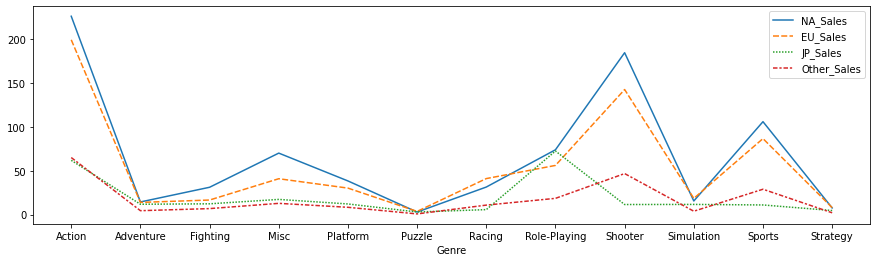

In [173]:
#NA, 최근 10년의 트랜드(2011~2020)
df0 = dfy.copy()
df00 = df0[df0['Year'] > 2010]
df01 = df00[['Genre', 'NA_Sales']]
df01 = df01.groupby('Genre').sum()
#df01 = df01.sort_values(by='NA_Sales', ascending=False)

#EU, 최근 10년의 트랜드(2011~2020)
df02 = df00[['Genre', 'EU_Sales']]
df02 = df02.groupby('Genre').sum()
#df02 = df02.sort_values(by='EU_Sales', ascending=False)

#JP, 최근 10년의 트랜드(2011~2020)
df03 = df00[['Genre', 'JP_Sales']]
df03 = df03.groupby('Genre').sum()
#df03 = df03.sort_values(by='JP_Sales', ascending=False)

#Other, 최근 10년의 트랜드(2011~2020)
df04 = df00[['Genre', 'Other_Sales']]
df04 = df04.groupby('Genre').sum()
#df04 = df04.sort_values(by='Other_Sales', ascending=False)

df05 = pd.concat([df01, df02, df03, df04], axis=1, join='inner')

'''
Na : Action, shooter, sports
EU : Na와 동일
JP : Role-Playing, Action, Misc
Other : Na와 동일

!!! 따라서 JP을 제외한 국가는 선호 게임이 비슷하다. !!!
'''
plt.figure(figsize= (15,4))
sns.lineplot(data = df05)

\


##**2. 연도별 게임 트랜드**
---


---





In [174]:
dfy0 = df0[['Year','Genre']]

bins_y = list(range(1980, 2021, 10)) 
bins_y_label = [str(x)+'년대' for x in bins_y]
dfy0['years'] = pd.cut(dfy0['Year'], bins_y, right = False, labels = bins_y_label[:-1])
# 2020 Simulation 한 건 제외 (2020년대 삭제해서)

dfy1 = dfy0.copy()

dfy1['Year'] = dfy1.at[:,'Year'] = 1
dfy2 = dfy1.groupby(['years', 'Genre']).sum()
dfy2.rename(columns = {'Year':'Count'}, inplace = True)
'''
1980년대 : Action, Platfrom, Shooter
1990년대 : Sports, Fighting, Racing
2000년대 : Action, Sports, Misc 
2010년대 : 2000년대와 동일
'''
dfy2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Count
years  Genre              
1980년대 Action           66
       Adventure         2
       Fighting          4
       Misc              8
       Platform         33
       Puzzle           19
       Racing            8
       Role-Playing      9
       Shooter          30
       Simulation        3
       Sports           22
       Strategy          0
1990년대 Action          161
       Adventure        97
       Fighting        193
       Misc            115
       Platform        125
       Puzzle           71
       Racing          181
       Role-Playing    171
       Shooter         137
       Simulation       86
       Sports          304
       Strategy        123
2000년대 Action         1579
       Adventure       632
       Fighting        442
       Misc           1021
       Platform        565
       Puzzle          361
       Racing          797
       Role-Playing    729
       Shooter         718
       Simulation      551
       Sports         1404
       Strategy        379
2010년대 Action         1436
       Adventure       539
       Fighting        196
       Misc            561
       Platform        151
       Puzzle          116
       Racing          234
       Role-Playing    557
       Shooter         395
       Simulation      208
       Sports          569
       Strategy        168


##**3. 상위 출고량 게임 분석 및 시각화**

---


---












####**1)   총 매출 상위 50개 게임 내림차순 정렬 -> 상위 게임 장르 및 플랫폼 정리**
---


In [175]:
# 총 매출 상위 50개 게임 내림차순 정렬 -> 상위 게임 장르 및 플랫폼 정리
sales = ['EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']
dfs = df0.copy()
dfs['Total_Sales'] = df0[sales].sum(axis = 1)
dfs1 = dfs[['Name', 'Platform', 'Genre', 'Total_Sales']]
dfs2 = dfs1.sort_values(by='Total_Sales' ,ascending=False).reset_index()
dfs3 = dfs2.loc[:49, :]
dfs3.head()

,index,Name,Platform,Genre,Total_Sales
0,2908,Wii Sports,Wii,Sports,82.74
1,4199,Super Mario Bros.,NES,Platform,40.24
2,12579,Mario Kart Wii,Wii,Racing,35.83
3,3352,Wii Sports Resort,Wii,Sports,33.00
4,7829,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.38


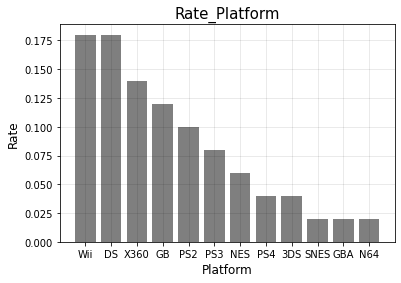

In [176]:
#dfs4 = dfs3[['Platform', 'Genre']]
#rate_P = dfs4['Platform'].value_counts(normalize=True)
#rate_G = dfs4['Genre'].value_counts(normalize=True)
#print(rate_P, rate_G)
bar_P = dfs3['Platform'].value_counts(normalize=True).reset_index()
plt.title("Rate_Platform", fontsize=15)
plt.bar(bar_P["index"], bar_P['Platform'],color='k', alpha=.5)
plt.ylabel("Rate", fontsize=12)
plt.xlabel("Platform", fontsize=12)
plt.grid(color='k', alpha=.1)
plt.show()

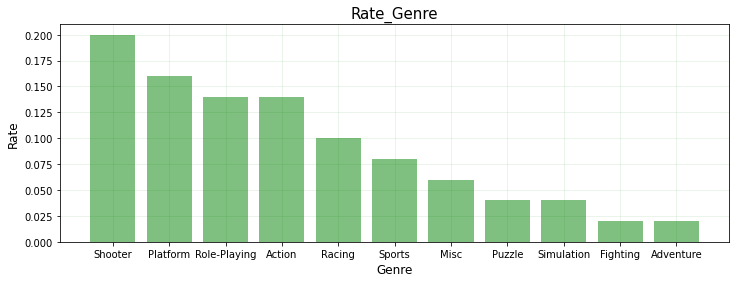

In [177]:
bar_G = dfs3['Genre'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(12,4))
plt.title("Rate_Genre", fontsize=15)
plt.bar(bar_G["index"], bar_G['Genre'],color='g', alpha=0.5)
plt.ylabel("Rate", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.grid(color='g', alpha=.1)
plt.show()

In [178]:
dfs4 = dfs3[['Platform', 'Genre']]
rate_P = dfs4['Platform'].value_counts(normalize=True)
rate_G = dfs4['Genre'].value_counts(normalize=True)
print(rate_P, rate_G)

'''
따라서 상위 판매량 게임 중
Wii, DS, X360 의 플랫폼이 약 50%의 점유율
Platform, Role-Playing, Action, Racing의 장르가 약 54%로 강세를 보임
'''

Wii     0.18
DS      0.18
X360    0.14
GB      0.12
PS2     0.10
PS3     0.08
NES     0.06
PS4     0.04
3DS     0.04
SNES    0.02
GBA     0.02
N64     0.02
Name: Platform, dtype: float64 Shooter         0.20
Platform        0.16
Role-Playing    0.14
Action          0.14
Racing          0.10
Sports          0.08
Misc            0.06
Puzzle          0.04
Simulation      0.04
Fighting        0.02
Adventure       0.02
Name: Genre, dtype: float64


'\n따라서 상위 판매량 게임 중\nWii, DS, X360 의 플랫폼이 약 50%의 점유율\nPlatform, Role-Playing, Action, Racing의 장르가 약 54%로 강세를 보임\n'

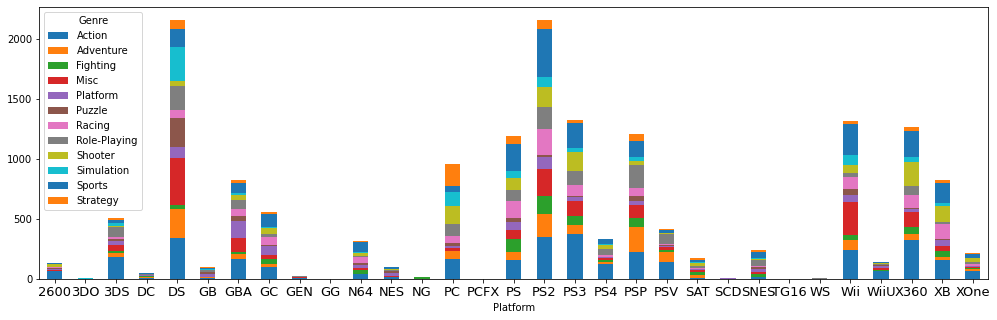

In [179]:
# 가시성 떨어지는 번외
s = df.groupby(['Platform', 'Genre']).size().unstack()
s.plot(kind='bar',stacked=True, figsize=(17,5))
plt.xticks(rotation=0, fontsize=13)
plt.show()



####**2) (최근 5년)총 매출 상위 50개 게임 내림차순 정렬 -> 상위 게임 장르 및 플랫폼 정리**
---




In [180]:
dfys = df0[df0['Year'] >= 2015].copy()
sales = ['EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']
dfys['Total_Sales'] = dfys[sales].sum(axis = 1)
dfys1 = dfys[['Name', 'Platform', 'Genre', 'Total_Sales']]
dfys2 = dfys1.sort_values(by='Total_Sales' ,ascending=False).reset_index()
dfys3 = dfys2.loc[:49, :]
dfys3.head()

,index,Name,Platform,Genre,Total_Sales
0,9070,Call of Duty: Black Ops 3,PS4,Shooter,14.24
1,2639,FIFA 16,PS4,Sports,8.49
2,3024,Star Wars Battlefront (2015),PS4,Shooter,7.67
3,15981,Call of Duty: Black Ops 3,XOne,Shooter,7.29
4,11292,Fallout 4,PS4,Role-Playing,6.96


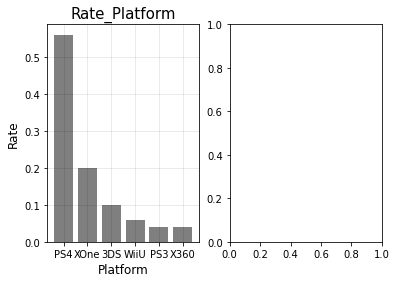

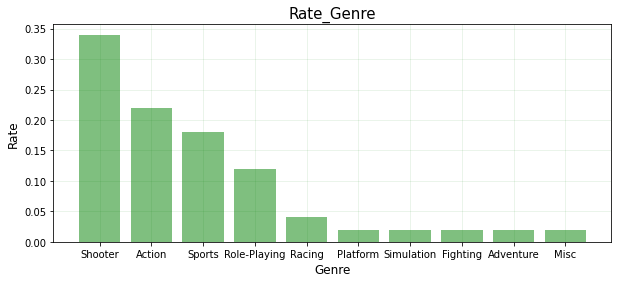

In [181]:
bar_p = dfys3['Platform'].value_counts(normalize=True).reset_index()
plt.subplot(121);
plt.title("Rate_Platform", fontsize=15);
plt.bar(bar_p["index"], bar_p['Platform'],color='k', alpha=.5);
plt.ylabel("Rate", fontsize=12)
plt.xlabel("Platform", fontsize=12)
plt.grid(color='k', alpha=.1)

bar_g = dfys3['Genre'].value_counts(normalize=True).reset_index()
plt.subplot(122)
plt.figure(figsize=(10,4))
plt.title("Rate_Genre", fontsize=15)
plt.bar(bar_g["index"], bar_g['Genre'],color='g', alpha=0.5)
plt.ylabel("Rate", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.grid(color='g', alpha=.1)

plt.show()

#저 빈 그래프는 뭐니..?


####**3) (최근 5년,{EU,NA})총 매출 상위 50개 게임 내림차순 정렬 -> 상위 게임 장르 및 플랫폼 정리**
---



In [182]:
df_ys = df0[df0['Year'] >= 2015].copy()
sales = ['EU_Sales', 'NA_Sales']
df_ys['Total_Sales'] = df_ys[sales].sum(axis = 1)
df_ys1 = df_ys[['Name', 'Platform', 'Genre', 'Total_Sales']]
df_ys2 = df_ys1.sort_values(by='Total_Sales' ,ascending=False).reset_index()
df_ys3 = df_ys2.loc[:49, :]
df_ys3.head()

,index,Name,Platform,Genre,Total_Sales
0,9070,Call of Duty: Black Ops 3,PS4,Shooter,11.58
1,2639,FIFA 16,PS4,Sports,7.17
2,15981,Call of Duty: Black Ops 3,XOne,Shooter,6.61
3,3024,Star Wars Battlefront (2015),PS4,Shooter,6.22
4,11292,Fallout 4,PS4,Role-Playing,5.62


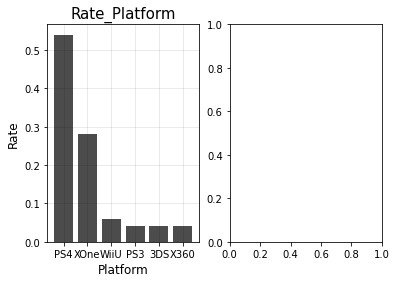

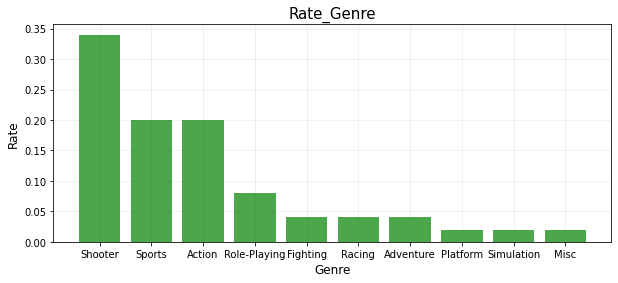

In [183]:
bar_p1 = df_ys3['Platform'].value_counts(normalize=True).reset_index()
plt.subplot(121);
plt.title("Rate_Platform", fontsize=15);
plt.bar(bar_p1["index"], bar_p1['Platform'],color='k', alpha=.7);
plt.ylabel("Rate", fontsize=12)
plt.xlabel("Platform", fontsize=12)
plt.grid(color='k', alpha=.1)

bar_g1 = df_ys3['Genre'].value_counts(normalize=True).reset_index()
plt.subplot(122);
plt.figure(figsize=(10,4))
plt.title("Rate_Genre", fontsize=15)
plt.bar(bar_g1["index"], bar_g1['Genre'],color='g', alpha=0.7)
plt.ylabel("Rate", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.grid(color='g', alpha=.1)

plt.show()

#저 빈 그래프는 뭐니..?

####**4) 지역 별 최근 5개년 게임 장르 판매율 추이**
---


In [184]:
df000 = df0[df0['Year'] >= 2015]
df_f = df000[['Genre','EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']]
df_f1 = df_f.groupby('Genre')[['EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']].sum()
df_f1

,EU_Sales,NA_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,30.25,27.70,21.36,8.80
Adventure,3.75,3.10,2.01,0.96
Fighting,3.53,5.20,1.43,1.47
Misc,3.80,5.03,2.91,1.07
Platform,2.68,3.29,1.40,0.76
Puzzle,0.11,0.05,0.52,0.01
Racing,5.88,2.30,0.29,1.12
Role-Playing,13.81,14.74,10.38,4.29
Shooter,31.93,38.23,3.30,10.83


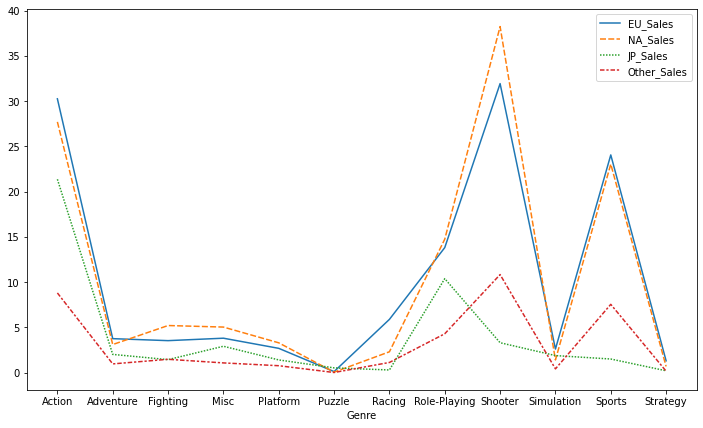

In [185]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_f1)

####**5) 장르별 게임 당 매출 순위**
---

In [186]:
# (2015년~) 장르별 게임 출시량 
df000 = df0[df0['Year'] >= 2015]
df_l = df000[['Year','Genre']]
df_l['Year'] = df_l.at[:,'Year'] = 1
df_l = df_l.groupby('Genre').sum()
df_l.rename(columns = {'Year':'Game_Count'}, inplace = True)
dfdf = df_l.reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [187]:
# 장르별 매출 총액
sales = ['EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']
df_a = df000[['Genre','EU_Sales', 'NA_Sales', 'JP_Sales',	'Other_Sales']]
df_a['Total_Sales'] = df_a[sales].sum(axis = 1)
df_a1 = df_a[['Genre','Total_Sales']]
df_a2 = df_a1.groupby('Genre').sum()
dfdf1 = df_a2.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [188]:
df_A = pd.merge(dfdf1, dfdf)
df_A

,Genre,Total_Sales,Game_Count
0,Action,88.11,373
1,Adventure,9.82,87
2,Fighting,11.63,35
3,Misc,12.81,57
4,Platform,8.13,24
5,Puzzle,0.69,6
6,Racing,9.59,39
7,Role-Playing,43.22,120
8,Shooter,84.29,66
9,Simulation,6.29,25


In [189]:
df_A['Sales/Unit'] = df_A['Total_Sales'] / df_A['Game_Count']
df_A.sort_values(by = 'Sales/Unit',ascending = False)

,Genre,Total_Sales,Game_Count,Sales/Unit
8,Shooter,84.29,66,1.277121
10,Sports,56.12,100,0.561200
7,Role-Playing,43.22,120,0.360167
4,Platform,8.13,24,0.338750
2,Fighting,11.63,35,0.332286
9,Simulation,6.29,25,0.251600
6,Racing,9.59,39,0.245897
0,Action,88.11,373,0.236220
3,Misc,12.81,57,0.224737
5,Puzzle,0.69,6,0.115000


In [192]:
df_A[['Genre','Sales/Unit']].sort_values(by = 'Sales/Unit',ascending = False)

,Genre,Sales/Unit
8,Shooter,1.277121
10,Sports,0.561200
7,Role-Playing,0.360167
4,Platform,0.338750
2,Fighting,0.332286
9,Simulation,0.251600
6,Racing,0.245897
0,Action,0.236220
3,Misc,0.224737
5,Puzzle,0.115000


In [198]:
#시장 파이
Pie = df_f1.sum(axis=0)
Pie

EU_Sales       123.69
NA_Sales       124.75
JP_Sales        47.18
Other_Sales     37.42
dtype: float64

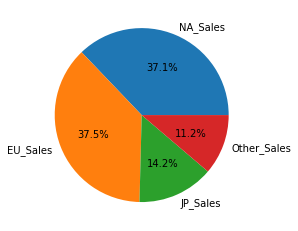

In [199]:
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales',	'Other_Sales']

plt.pie(Pie, labels=labels, autopct='%.1f%%')
plt.show()